In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
pd

<module 'pandas' from 'C:\\Users\\Tommy\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\pandas\\__init__.py'>

In [3]:
df_data = pd.read_csv('insurance.csv')
df_data = df_data.drop(labels=['region'],axis=1)
df_data = df_data.drop(labels=['children'],axis=1)
df_data         

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520
...,...,...,...,...,...
1333,50,male,30.970,no,10600.54830
1334,18,female,31.920,no,2205.98080
1335,18,female,36.850,no,1629.83350
1336,21,female,25.800,no,2007.94500


In [4]:
#transform catorical to quiantitive
labelMapSex= {'female':0, 'male':1}
labelMapSmoker= {'yes':1, 'no':0}

df_data['SexRevised'] = df_data['sex'].map(labelMapSex)
df_data['SmokerRevised'] = df_data['smoker'].map(labelMapSmoker)

In [5]:
df_data

,age,sex,bmi,smoker,charges,SexRevised,SmokerRevised
0,19,female,27.900,yes,16884.92400,0,1
1,18,male,33.770,no,1725.55230,1,0
2,28,male,33.000,no,4449.46200,1,0
3,33,male,22.705,no,21984.47061,1,0
4,32,male,28.880,no,3866.85520,1,0
...,...,...,...,...,...,...,...
1333,50,male,30.970,no,10600.54830,1,0
1334,18,female,31.920,no,2205.98080,0,0
1335,18,female,36.850,no,1629.83350,0,0
1336,21,female,25.800,no,2007.94500,0,0


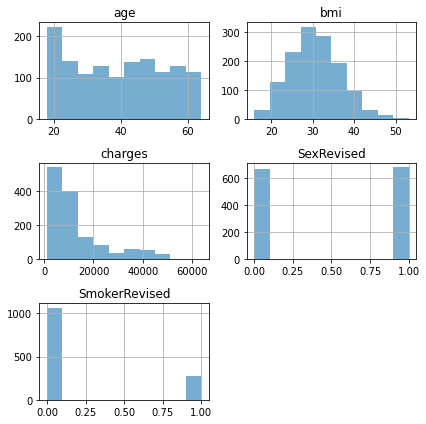

In [6]:
# bar chart
df_data.hist(alpha=0.6,figsize=(6,6))
plt.tight_layout()
plt.show()

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>,
        <AxesSubplot:xlabel='SexRevised', ylabel='age'>,
        <AxesSubplot:xlabel='SmokerRevised', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>,
        <AxesSubplot:xlabel='SexRevised', ylabel='bmi'>,
        <AxesSubplot:xlabel='SmokerRevised', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>,
        <AxesSubplot:xlabel='SexRevised', ylabel='charges'>,
        <AxesSubplot:xlabel='SmokerRevised', ylabel='charges'>],
       [<AxesSubplot:xlabel='age', ylabel='SexRevised'>,
        <AxesSubplot:xlabel='bmi', ylabel='SexRevised'>,
        <AxesSubplot:xlabel='charges', ylabel='Sex

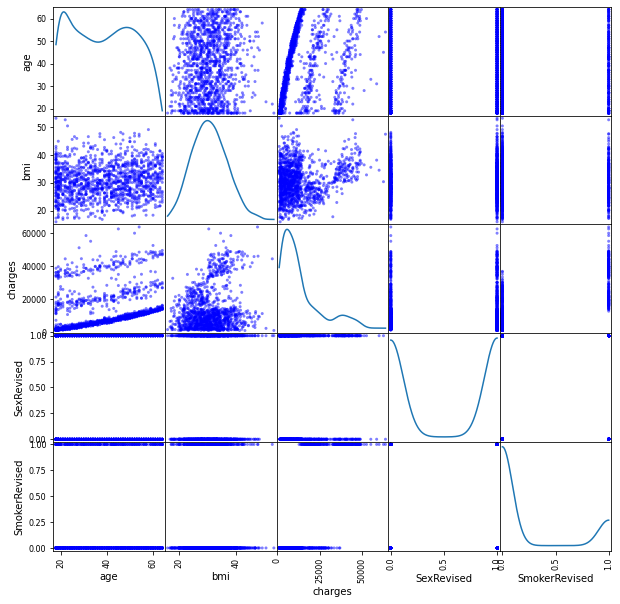

In [7]:
#Kernal Density Estimation
from pandas.plotting import scatter_matrix
scatter_matrix(df_data, figsize=(10,10), color='b', diagonal='kde')

C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


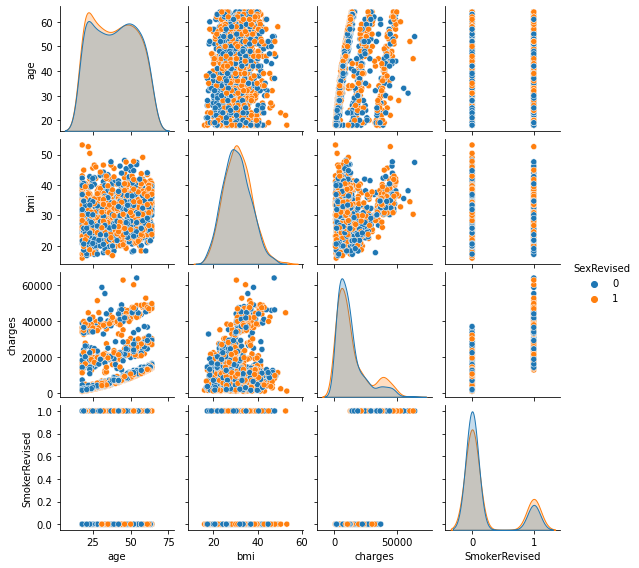

In [8]:
#Kernal Density Estimation
sns.pairplot(df_data, hue="SexRevised", size=2, diag_kind='kde')

<AxesSubplot:>

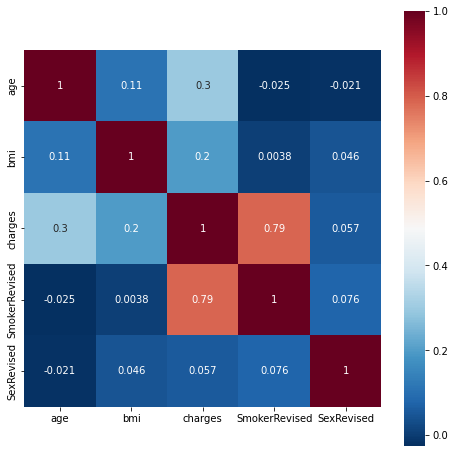

In [9]:
#Correlation map
corr = df_data [['age','bmi','charges','SmokerRevised','SexRevised']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True , annot= True, cmap= 'RdBu_r')

C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


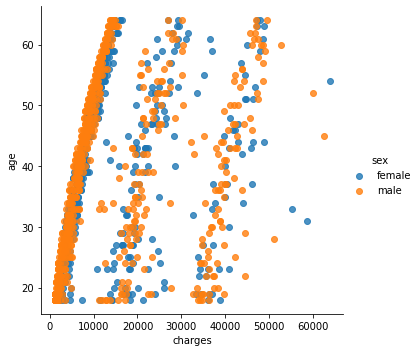

In [10]:
#Scatter char
sns.lmplot('charges' ,'age', hue= 'sex', data= df_data, fit_reg=False)

C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


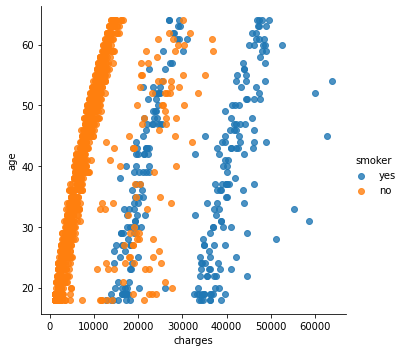

In [11]:
sns.lmplot('charges','age',hue='smoker',data=df_data,fit_reg = False)

[Text(0.5, 0, 'SmokerRevised'),
 Text(0.5, 1.0, 'distribution of SmokerRevised')]

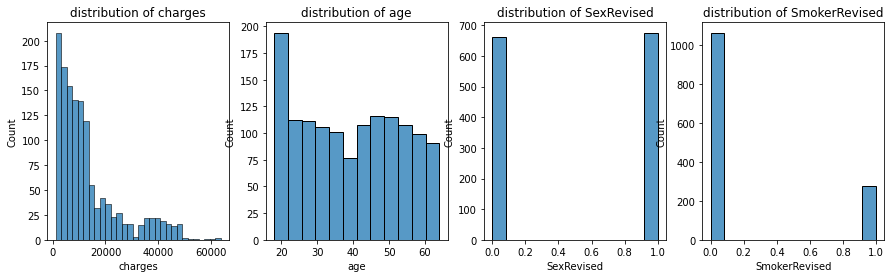

In [12]:
#bar char
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)
sns.histplot(df_data['charges'][:],ax=axes[0])
sns.histplot(df_data['age'][:],ax=axes[1])
sns.histplot(df_data['SexRevised'][:],ax=axes[2])
sns.histplot(df_data['SmokerRevised'][:],ax=axes[3])

axes[0].set(xlabel='charges',title='distribution of charges')
axes[1].set(xlabel='age',title='distribution of age')
axes[2].set(xlabel='SexRevised',title='distribution of SexRevised')
axes[3].set(xlabel='SmokerRevised',title='distribution of SmokerRevised')

In [13]:
#check loss
x =df_data.drop(labels=['sex','smoker'],axis=1).values
print('checked missing data(NAN mount):',len(np.where(np.isnan(x))[0]))

checked missing data(NAN mount): 0


In [14]:
np.set_printoptions(suppress=True)

In [15]:
#standarlize mean and deviation
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(x)
x_scaled = scaler.transform(x)

print('meam of x',x.mean(axis=0))
print('deviation of x',x.std(axis=0))
print()
print('standardScaler mean of x after scaling ',x_scaled.mean(axis=0))
print('standardScaler deviation of x after scaling ',x_scaled.std(axis=0))

meam of x [   39.20702541    30.66339686 13270.42226514     0.50523169
     0.20478326]
deviation of x [   14.04470904     6.09590764 12105.48497556     0.49997263
     0.40354315]

standardScaler mean of x after scaling  [-0. -0. -0. -0.  0.]
standardScaler deviation of x after scaling  [1. 1. 1. 1. 1.]


[Text(0.5, 0, 'SmokerRevised'),
 Text(0.5, 1.0, 'distribution of SmokerRevised')]

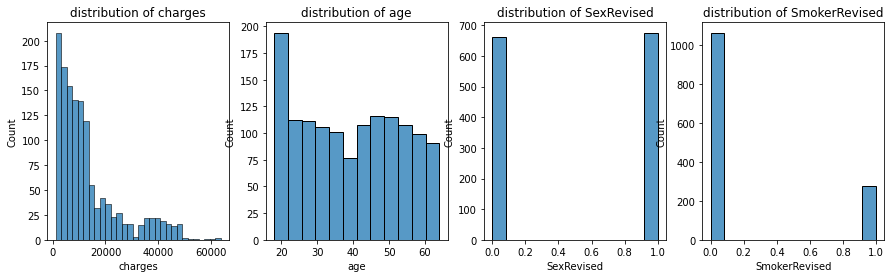

In [16]:
#bar char
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)
sns.histplot(df_data['charges'][:],ax=axes[0])
sns.histplot(df_data['age'][:],ax=axes[1])
sns.histplot(df_data['SexRevised'][:],ax=axes[2])
sns.histplot(df_data['SmokerRevised'][:],ax=axes[3])

axes[0].set(xlabel='charges',title='distribution of charges')
axes[1].set(xlabel='age',title='distribution of age')
axes[2].set(xlabel='SexRevised',title='distribution of SexRevised')
axes[3].set(xlabel='SmokerRevised',title='distribution of SmokerRevised')

In [17]:
from sklearn.cluster import KMeans

kmeansModel = KMeans(n_clusters=3, random_state=46)
cluster_pred=kmeansModel.fit_predict(x)

In [18]:
kmeansModel.inertia_

23039889420.849686

In [19]:
kmeansModel.cluster_centers_

array([[   44.32462687,    28.66647388, 19661.44701052,     0.45895522,
            0.45522388],
       [   37.59802848,    30.49973165,  6609.18398627,     0.49835706,
            0.00109529],
       [   39.82802548,    35.0239172 , 41097.91218134,     0.62420382,
            0.96178344]])

C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


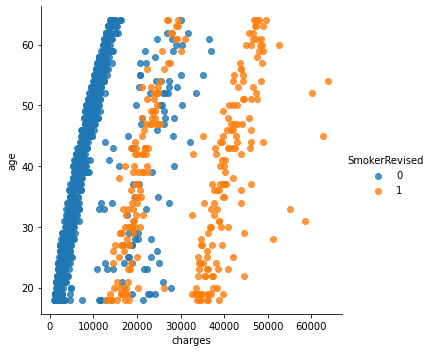

In [20]:
sns.lmplot('charges','age',hue='SmokerRevised',data=df_data,fit_reg=False)

C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


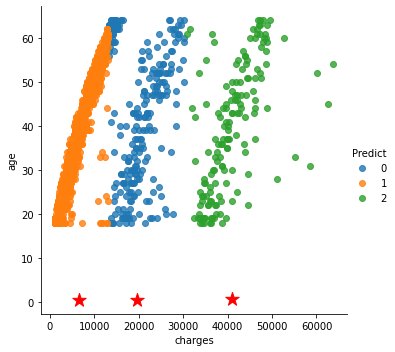

In [21]:
df_data['Predict']=cluster_pred
sns.lmplot('charges','age',data=df_data,hue='Predict',fit_reg=False)
plt.scatter(kmeansModel.cluster_centers_[:,2],kmeansModel.cluster_centers_[:,3],s=200,c='r',marker='*')

In [22]:
#use inertia to analyst
kmeans_list=[KMeans(n_clusters=k,random_state=46).fit(x)
            for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_list]

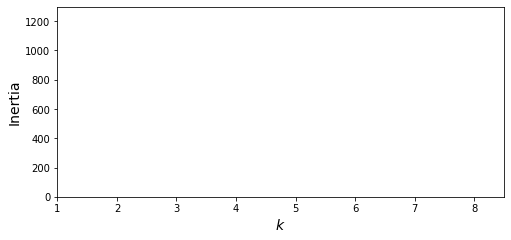

In [23]:
# as u can see, k is bigger, inertia will be smaller.

plt.figure(figsize=(8,3.5))
plt.plot(range(1,10),inertias,'bo-')
plt.xlabel('$k$',fontsize=14)
plt.ylabel('Inertia',fontsize=14)
plt.annotate('Elbow',
            xy=(3,inertias[3]),
            xytext=(0.55,0.55),
            textcoords='figure fraction',
            fontsize=16,
            arrowprops=dict(facecolor='black',shrink=0.1)
            )
plt.axis([1,8.5,0,1300])
plt.show()